# 형태소분석기 비교

In [ ]:
from konlpy.tag import Kkma, Komoran, Okt
from mecab import MeCab
from konlp.kma.klt2023 import klt2023

mec = MeCab()
okt = Okt()
kkm = Kkma()
kom = Komoran()
klt = klt2023()

## 정확도 비교

In [ ]:
txt = '내 나이와 같은 영화를 지금 본 나는 감동적이다..하지만 훗날 다시보면대사하나하나 그 감정을완벽하게 이해할것만 같다...'

print(txt)
print(f'mec: {mec.nouns(txt)}') #mecab
print(f'kom: {kom.nouns(txt)}') #komoran
print(f'kkm: {kkm.nouns(txt)}') #kkma
print(f'okt: {okt.nouns(txt)}') #okt
print(f'klt: {klt.nouns(txt)}') #klt

내 나이와 같은 영화를 지금 본 나는 감동적이다..하지만 훗날 다시보면대사하나하나 그 감정을완벽하게 이해할것만 같다...
mec: ['내', '나이', '영화', '나', '감동', '훗날', '보면대', '사', '하나', '하나', '감정', '완벽', '이해', '것']
kom: ['나이', '영화', '감동', '하지', '훗날', '다시', '보면', '대사', '하나하나', '감정', '을', '완벽', '이해', '것']
kkm: ['내', '나이', '영화', '나', '감동적', '훗날', '대사', '대사하나하나', '하나하나', '감정', '완벽', '이해']
okt: ['내', '나이', '영화', '지금', '나', '감동', '훗날', '다시', '사하나', '그', '감정', '이해']
klt: ['나', '나이', '영화', '나', '감동적', '훗날', '다시보면대사하나', '감정을완벽', '이해할것']


In [ ]:
txt = '이거어렸을때되게재밌게봄ㅋㅋ이정재 이범수ㅋㅋㅋㅋ연기쩜'

print(txt)
print(f'mec: {mec.nouns(txt)}') #mecab
print(f'kom: {kom.nouns(txt)}') #komoran
print(f'kkm: {kkm.nouns(txt)}') #kkma
print(f'okt: {okt.nouns(txt)}') #okt
print(f'klt: {klt.nouns(txt)}') #klt

이거어렸을때되게재밌게봄ㅋㅋ이정재 이범수ㅋㅋㅋㅋ연기쩜
mec: ['이거', '때', '이정재', '이범수', '연기']
kom: []
kkm: ['이거', '때', '봄', '이정재', '이', '이범수', '범수', '연기']
okt: ['거', '때', '봄', '이정재', '이범수', '연기', '쩜']
klt: ['이거어렸을때되게재밌게봄', '이정', '이범수', '연기쩜']


> Komoran은 띄어쓰기가 잘 되어있지 않은 문장에 대해서 형태소 분석 성능이 떨어짐

## 속도 비교

In [ ]:
import pandas as pd
ratings = pd.read_csv('/home/kyuyeon/data/nsmc/ratings.txt', sep='\t')
ratings.head(3)

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1


100%|██████████| 10000/10000 [00:08<00:00, 1159.35it/s]


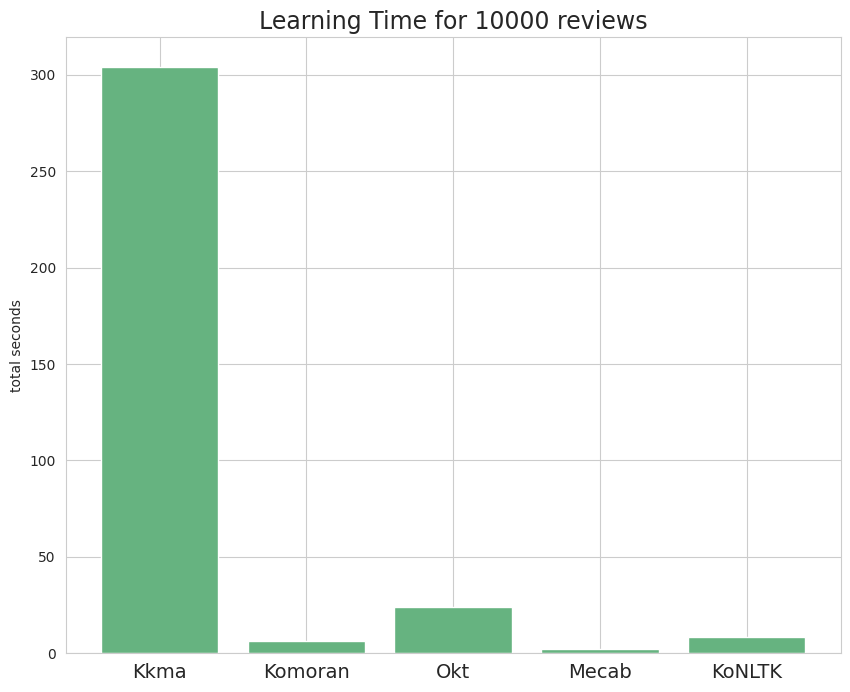

In [ ]:
import time
from tqdm import tqdm

def tagger_time(tagger, texts):
  time_sum = 0

  for sentence in tqdm(texts):
    t1 = time.time()
    try:
      tagger.nouns(sentence)
    except:
      pass
    t2 = time.time()

    time_sum += (t2 - t1)

  return time_sum
texts = ratings['document'][:10000]
time_list = []

for tagger in [kkm, kom, okt, mec, klt]:
  time_list.append(tagger_time(tagger, texts))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

tagger = ['Kkma', 'Komoran', 'Okt', 'Mecab', 'KoNLTK']

plt.figure(figsize=(10,8))
plt.bar(tagger, time_list, color=(0.4,0.7,0.5))
plt.title('Learning Time for 10000 reviews', fontsize=17)
plt.xticks(fontsize=14)
plt.ylabel('total seconds')
plt.savefig('/home/kyuyeon/문서/kmu/23-1/bigdata-latest/movie/speed.png', dpi=300)

> Kkma는 속도 측면에서 성능이 매우 떨어짐

#### references

https://soohee410.github.io/compare_tagger

> 속도 측면에서 Mecab 우수  
정규화 측면에서 Okt 우수  
두 가지 형태소 분석기에 대해서 실험 진행  